## K Means Clustering Algorithm

In [27]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs 

%matplotlib inline

In [28]:
X, y = make_blobs(n_samples=1000 , centers=3 , n_features=2 )

In [29]:
X

array([[-1.31105612,  4.30209566],
       [-0.72612356,  5.68982682],
       [ 0.02388949,  6.29644197],
       ...,
       [-2.22828827,  3.08558312],
       [ 6.7052827 ,  3.47751017],
       [-1.12322681,  5.82357675]])

In [30]:
y

array([1, 1, 1, 0, 2, 1, 1, 0, 0, 2, 0, 2, 1, 0, 2, 0, 0, 0, 0, 1, 1, 2,
       1, 2, 0, 2, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 2, 1, 0, 1, 2, 2, 2, 1,
       2, 2, 1, 1, 1, 0, 1, 0, 0, 0, 2, 0, 0, 1, 0, 1, 1, 2, 2, 2, 0, 0,
       1, 1, 0, 0, 2, 0, 0, 2, 0, 0, 0, 1, 2, 2, 0, 2, 0, 2, 1, 1, 0, 1,
       0, 0, 2, 0, 2, 2, 0, 1, 2, 2, 1, 1, 1, 2, 0, 0, 0, 2, 2, 2, 0, 0,
       2, 1, 1, 0, 1, 2, 0, 0, 0, 0, 2, 2, 1, 2, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 2, 0, 0, 2, 1, 1, 1, 0, 2, 2, 2, 0, 0, 2, 0, 1, 1, 2, 1,
       1, 2, 2, 1, 0, 2, 2, 1, 1, 0, 1, 2, 0, 1, 1, 1, 0, 0, 0, 1, 0, 2,
       2, 2, 1, 1, 2, 2, 2, 0, 0, 2, 1, 1, 2, 1, 0, 2, 2, 2, 2, 0, 2, 0,
       2, 2, 1, 0, 0, 2, 1, 0, 1, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 0, 2, 1,
       1, 0, 1, 0, 0, 1, 2, 1, 0, 0, 1, 0, 2, 2, 2, 2, 0, 0, 0, 1, 2, 0,
       1, 1, 2, 2, 0, 0, 1, 1, 1, 2, 1, 0, 2, 1, 2, 0, 0, 2, 0, 1, 2, 2,
       0, 2, 0, 1, 2, 1, 1, 1, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 1, 1, 2, 2,
       0, 0, 0, 1, 0, 0, 1, 0, 2, 1, 2, 2, 0, 1, 2,

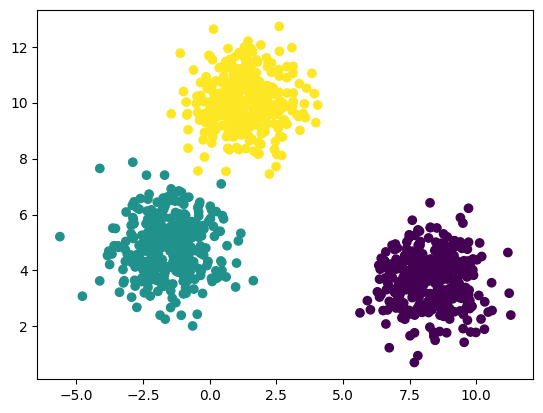

In [31]:
plt.scatter(X[:,0],X[:,1], c=y)

In [32]:
from sklearn.model_selection import train_test_split 

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.33 , random_state=42)

In [33]:
## Standardization -- feature scaling Techinues 

from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()

In [34]:
X_train_scaled = scaler.fit_transform(X_train)

In [35]:
X_test_scaled = scaler.transform(X_test)

In [36]:
from sklearn.cluster import KMeans 

In [38]:
# Elow Method to select the K Values

wcss = [ ]

for k in range(1,11):
    Kmeans = KMeans(n_clusters=k,init="k-means++") 
    Kmeans.fit(X_train_scaled)
    wcss.append(Kmeans.inertia_)

In [39]:
wcss

[1339.9999999999998,
 502.8906233997178,
 112.42993293821547,
 96.27915213460336,
 77.91524352837502,
 71.08792722022285,
 70.9859260781169,
 55.26695699816429,
 46.14031413099035,
 45.49366766542879]

Text(0, 0.5, 'wcss')

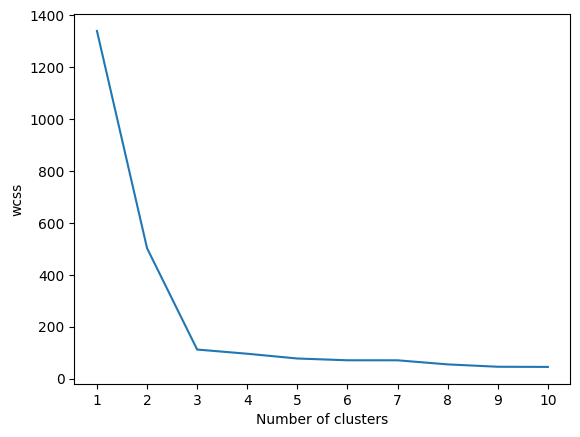

In [40]:
## Plot elow curve 

plt.plot(range(1,11) , wcss)

plt.xticks(range(1,11))
plt.xlabel("Number of clusters")
plt.ylabel("wcss")

In [41]:
Kmeans = KMeans(n_clusters=3,init="k-means++") 

In [42]:
Kmeans.fit_predict(X_train_scaled)

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 2, 2, 1, 2, 1, 1, 1, 0, 0, 0, 0,
       2, 2, 2, 2, 0, 0, 1, 0, 2, 1, 0, 1, 1, 2, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 2, 1, 0, 2, 1, 2, 0, 0, 0, 1, 2, 0, 1, 1, 2, 0, 0, 1, 2, 2, 2,
       2, 0, 1, 1, 2, 0, 2, 2, 0, 1, 0, 0, 2, 2, 1, 0, 1, 2, 2, 1, 1, 2,
       1, 1, 2, 1, 1, 1, 2, 1, 0, 0, 2, 0, 0, 2, 1, 2, 0, 1, 0, 0, 1, 0,
       2, 1, 2, 1, 1, 1, 1, 0, 1, 2, 1, 0, 0, 2, 1, 1, 2, 0, 2, 2, 2, 2,
       1, 0, 1, 2, 1, 1, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 2, 0, 2,
       0, 1, 0, 2, 1, 2, 2, 0, 1, 1, 2, 1, 1, 0, 0, 1, 1, 0, 2, 0, 0, 0,
       1, 1, 2, 1, 2, 2, 2, 2, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 2, 0, 1, 0,
       0, 0, 1, 2, 2, 0, 2, 0, 1, 2, 0, 0, 0, 1, 2, 0, 2, 0, 1, 0, 0, 1,
       2, 1, 0, 1, 1, 0, 2, 0, 1, 1, 2, 1, 2, 0, 0, 2, 1, 1, 2, 0, 2, 2,
       2, 1, 0, 2, 2, 0, 2, 1, 0, 1, 0, 1, 2, 1, 1, 2, 2, 0, 0, 1, 0, 1,
       0, 1, 2, 2, 0, 1, 2, 2, 1, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2, 0, 2, 0,
       1, 0, 1, 0, 1, 1, 2, 2, 2, 0, 1, 2, 1, 2, 2,

In [43]:
y_pred = Kmeans.predict(X_test_scaled)

In [44]:
y_pred

array([2, 0, 0, 0, 2, 0, 1, 0, 1, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 0, 1, 2,
       1, 0, 0, 0, 0, 1, 0, 2, 1, 1, 1, 1, 2, 0, 2, 2, 0, 1, 2, 0, 2, 0,
       1, 0, 0, 0, 0, 1, 0, 2, 1, 1, 0, 1, 1, 2, 2, 2, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 1, 1, 1, 2, 0, 1, 2, 1, 1, 1, 2, 1,
       2, 1, 0, 1, 0, 0, 0, 1, 1, 2, 0, 1, 0, 2, 1, 0, 0, 0, 2, 2, 1, 1,
       2, 2, 1, 1, 2, 2, 2, 0, 1, 0, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2,
       0, 0, 1, 2, 0, 2, 0, 2, 0, 2, 1, 2, 1, 0, 0, 0, 1, 2, 0, 2, 2, 2,
       1, 2, 1, 0, 1, 0, 0, 0, 0, 2, 0, 1, 2, 1, 2, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 2, 1, 0, 1, 2, 2, 2, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       2, 0, 1, 1, 0, 2, 0, 0, 0, 0, 1, 0, 2, 1, 1, 2, 0, 0, 0, 1, 1, 2,
       0, 1, 0, 2, 1, 1, 0, 0, 0, 1, 1, 2, 0, 2, 1, 2, 2, 0, 0, 0, 2, 1,
       0, 1, 0, 2, 0, 1, 1, 2, 2, 1, 2, 0, 1, 1, 1, 2, 2, 1, 1, 0, 0, 2,
       1, 2, 2, 2, 1, 2, 0, 2, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2,
       0, 2, 1, 0, 2, 1, 1, 1, 0, 0, 1, 0, 2, 0, 1,

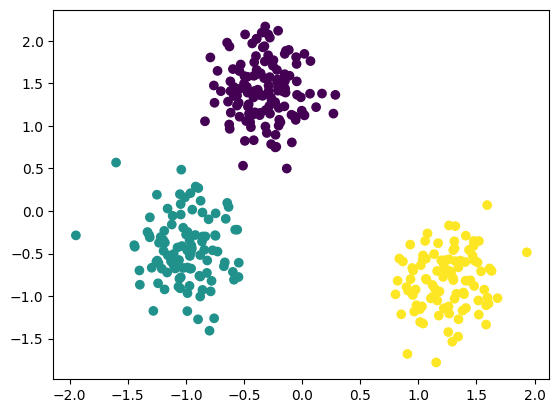

In [45]:
plt.scatter(X_test_scaled[:,0],X_test_scaled[:,1], c=y_pred)

In [46]:
## Validating the K Value 
## Kneelocator 
## Silhoutee Scoring 



In [47]:
## Kneelocator 

!pip install kneed

In [48]:
from kneed import KneeLocator


In [49]:
kl = KneeLocator(range(1,11) , wcss , curve="convex" , direction="decreasing")

In [50]:
kl.elbow

np.int64(3)

In [ ]:
## Silhoute Scoring 
from sklearn.metrics import silhouette_score 

In [52]:
silhouette_coefficients = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k , init="k-means++")
    kmeans.fit(X_train_scaled)
    score = silhouette_score(X_train_scaled , kmeans.labels_ )
    silhouette_coefficients.append(score)

In [53]:
silhouette_coefficients

[np.float64(0.6152105100735131),
 np.float64(0.7444308930242644),
 np.float64(0.6164387932758586),
 np.float64(0.47126132989825126),
 np.float64(0.3718937500107328),
 np.float64(0.3637543727058111),
 np.float64(0.36018566963951687),
 np.float64(0.3610746168595836),
 np.float64(0.35375203118542214)]

Text(0, 0.5, 'Silhoute Coefficeint')

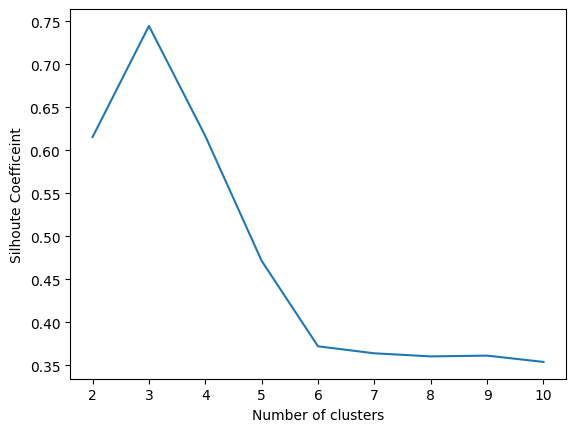

In [54]:
## plotting silhoute score
plt.plot(range(2,11) , silhouette_coefficients)

plt.xticks(range(2,11))
plt.xlabel("Number of clusters")
plt.ylabel("Silhoute Coefficeint")